In [123]:
#
#   Autor: Flávio Andrade dos Santos
#   Curso: Ciência de Dados e Analytics (PUC-RIO)
#   Data: 10/12/2024
#
#   Definição do Problema
#
#       A previsão de preços de imóveis é uma tarefa extremamente importante no setor imobiliário. As previsões com precisão auxiliam compradores e vendedores
#   na tomada de decisão. Neste trabalho, utilizaremos técnicas avançadas de regressão para prever preços dos imóveis.
#       A previsão do preço de venda de imóveis envolve a análise de diversas características que influenciam os preços. Com a utilização de técnicas avançadas
#   de regressão, podemos criar modelos que prevêem com precisão os preços das casas.
#       Definição do Problema:
#       O objetivo desse trabalho é construir um modelo de preços de casas para prever os valores médios de casas usando o conjunto de dados
#   "Kaggle California House Price". Tal dataset contém 10 tipos de métricas como populaçao, renda média etc para grupo de quarteirões na Califórnia.
#       O dataset contém informações do Censo da California de 1990 e contém 10 variáveis explicativas:
#
#       - Longitude:              Medida de quão longe uma casa está a oeste; um valor mais alto está mais a oeste
#       - Latitude:               Medida de quão ao norte uma casa está; um valor mais alto está mais ao norte
#       - Housing_median_age:     Idade mediana de uma casa dentro de um quarteirão; um número menor é um edifício mais novo
#       - Total_rooms:            Número total de quartos dentro de um bloco
#       - Total_bedrooms:         Número total de quartos dentro de um bloco
#       - Population:             Número total de pessoas que residem em um quarteirão
#       - Households:             Número total de domicílios, um grupo de pessoas que residem em uma unidade domiciliar, por quarteirão
#       - Median_income:          Renda média para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos)
#       - Median_house_value:     Valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)
#       - Ocean_proximity:        Localização da casa em relação ao oceano/mar
#
#
#   Link do dataset:
#   https://www.kaggle.com/datasets/shibumohapatra/house-price/data
#
#

In [58]:
#
#   Exploração dos Dados
#
#   Importação das bibliotecas
#
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
#
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importação do Seaborn
import seaborn as sns
import missingno as ms # para tratamento de missings
#
## Transformações Numéricas
from sklearn.preprocessing import StandardScaler  # padronização
from sklearn.preprocessing import MinMaxScaler    # normalização
#
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#
#   Carregamento do dataset
#
print("Iniciando a fase ETL: ")
print("Lendo o dataset... ")
url = "https://raw.githubusercontent.com/fasantosgh/MVP_MachineLearning/refs/heads/main/Data/1553768847-housing.csv"
# Leitura do dataset
dataset = pd.read_csv(url, delimiter=',')
# Mostra as primeiras linhas do dataset
dataset.head()

Iniciando a fase ETL: 
Lendo o dataset... 


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [59]:
#
#   Verficando as dimensões do dataset
#
#
dataset.shape

(20640, 10)

In [60]:
#
# Exibindo últimas linhas
#
dataset.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
20635         845         330         1.5603          INLAND   
20636         356         114         2.5568          INLAND   
20637        1007         433         1.7000          INLAND   
20638         741         349         1.8672          INLAND   
20639        1387         530         2.3886          INLAND   

       median_house_value  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400

In [61]:
#
#   Exibindo os nomes das colunas
#
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [62]:
#
#   Verificando os tipos de cada coluna do dataframe
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [63]:
#
#
#   Limpeza dos dados
#
#   Removendo linhas duplicadas, caso existam
#
dataset = dataset.drop_duplicates()
#
#   Contando o número de na values
#

dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
stats_dados_faltantes(df=dataset)

{'total_bedrooms': {'quantidade': 207, 'porcentagem': 1.0}}


In [64]:
#
# Observa-se que há algumas linhas com valores nulos.
# Como são poucas linhas em relação ao total, elas seram elimanadas:
#
dataset = dataset.dropna(how='any')
# dataset.shape
# Renumerar os índices
dataset = dataset.reset_index(drop=True)

print("\nDataFrame com índices renumerados:")
print(dataset)



DataFrame com índices renumerados:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                  25         1665           374.0   
20429    -121.21     39.49                  18          697           150.0   
20430    -121.22     39.43                  17         2254           485.0   
20431    -121.32     39.43                  18         1860           409.0   
20432    -121.24     39.37                  16         2785           616.0   

       populati

In [65]:
#
#     O atributo "ocean_proximity" é categórico e precisamos fazer uma transformação numérica
# para utilizá-lo no treinamento.
#     Transformação categórica One hot encoding definindo o transformador como one hot encoding
encoder = OneHotEncoder()

# transformando os dados
dados_ohe = encoder.fit_transform(dataset[['ocean_proximity']]).toarray()

# Cria um dataframe com o resultado
dados_ohe = pd.DataFrame(data=dados_ohe, index=range(0,20433))

# Unindo os dois dataframes
dataset = dataset.join(dados_ohe, rsuffix='_dados_ohe')

# Excluindo a coluna ocean_proximity
dataset = dataset.drop(['ocean_proximity'], axis=1)

# Renomeando as colunas
dataset = dataset.rename(columns={0:'<1H_OCEAN', 1:'INLAND', 2:'ISLAND', 3:'NEAR_BAY', 4:'NEAR_OCEAN'})

dataset


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                  25         1665           374.0   
20429    -121.21     39.49                  18          697           150.0   
20430    -121.22     39.43                  17         2254           485.0   
20431    -121.32     39.43                  18         1860           409.0   
20432    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  <1H_OCEAN  \
0             322         126         8.3252              452600        0.0   
1            2401        1138         8.3014              358500        0.0   
2             496         177         7.2574              352100        0.0   
3             558         219         5.6431              341300        0.0   
4             565         259         3.8462              342200        0.0   
...           ...         ...            ...                 ...        ...   
20428         845         330         1.5603               78100        0.0   
20429         356         114         2.5568               77100        0.0   
20430        1007         433         1.7000               92300        0.0   
20431         741         349         1.8672               84700        0.0   
20432        1387         530         2.3886               89400        0.0   

       INLAND  ISLAND  NEAR_BAY  NEAR_OCEAN  
0         0.0     0.0       1.0         0.0  
1         0.0     0.0       1.0         0.0  
2         0.0     0.0       1.0         0.0  
3         0.0     0.0       1.0         0.0  
4         0.0     0.0       1.0         0.0  
...       ...     ...       ...         ...  
20428     1.0     0.0       0.0         0.0  
20429     1.0     0.0       0.0         0.0  
20430     1.0     0.0       0.0         0.0  
20431     1.0     0.0       0.0         0.0  
20432     1.0     0.0       0.0         0.0  

[20433 rows x 14 columns]

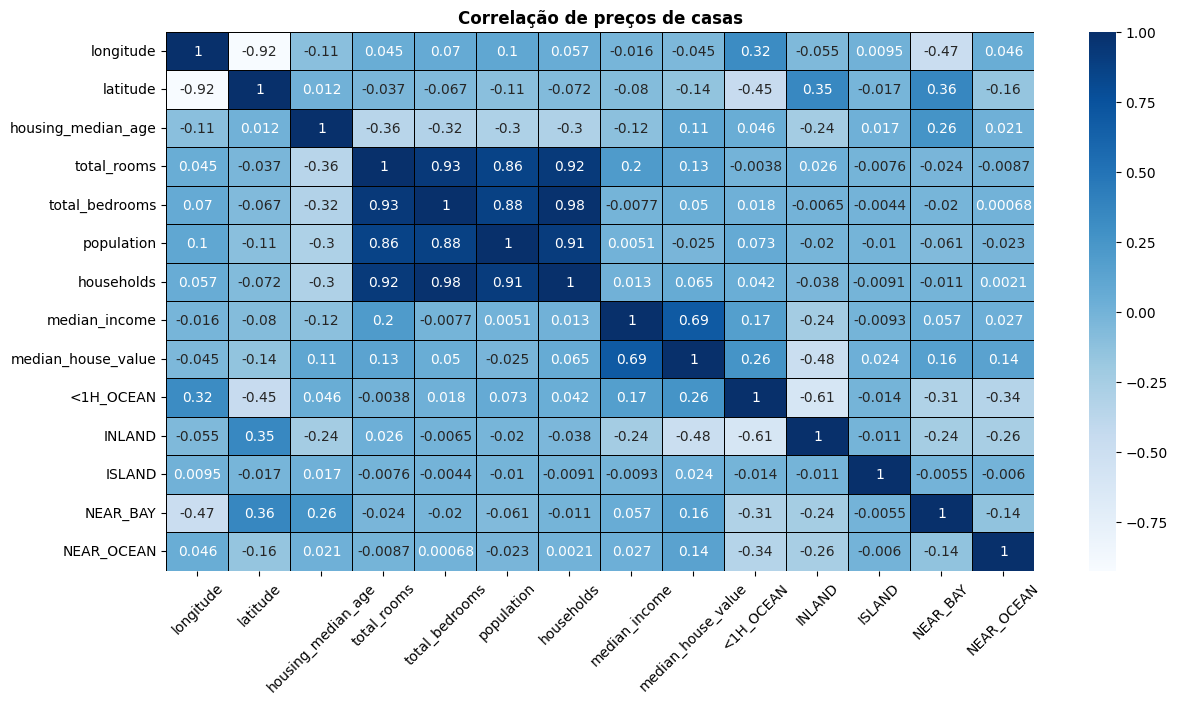

In [66]:
corr_mat = dataset.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,cmap ="Blues",annot=True,linewidth=0.5,linecolor ="black")
plt.title("Correlação de preços de casas", loc="center", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

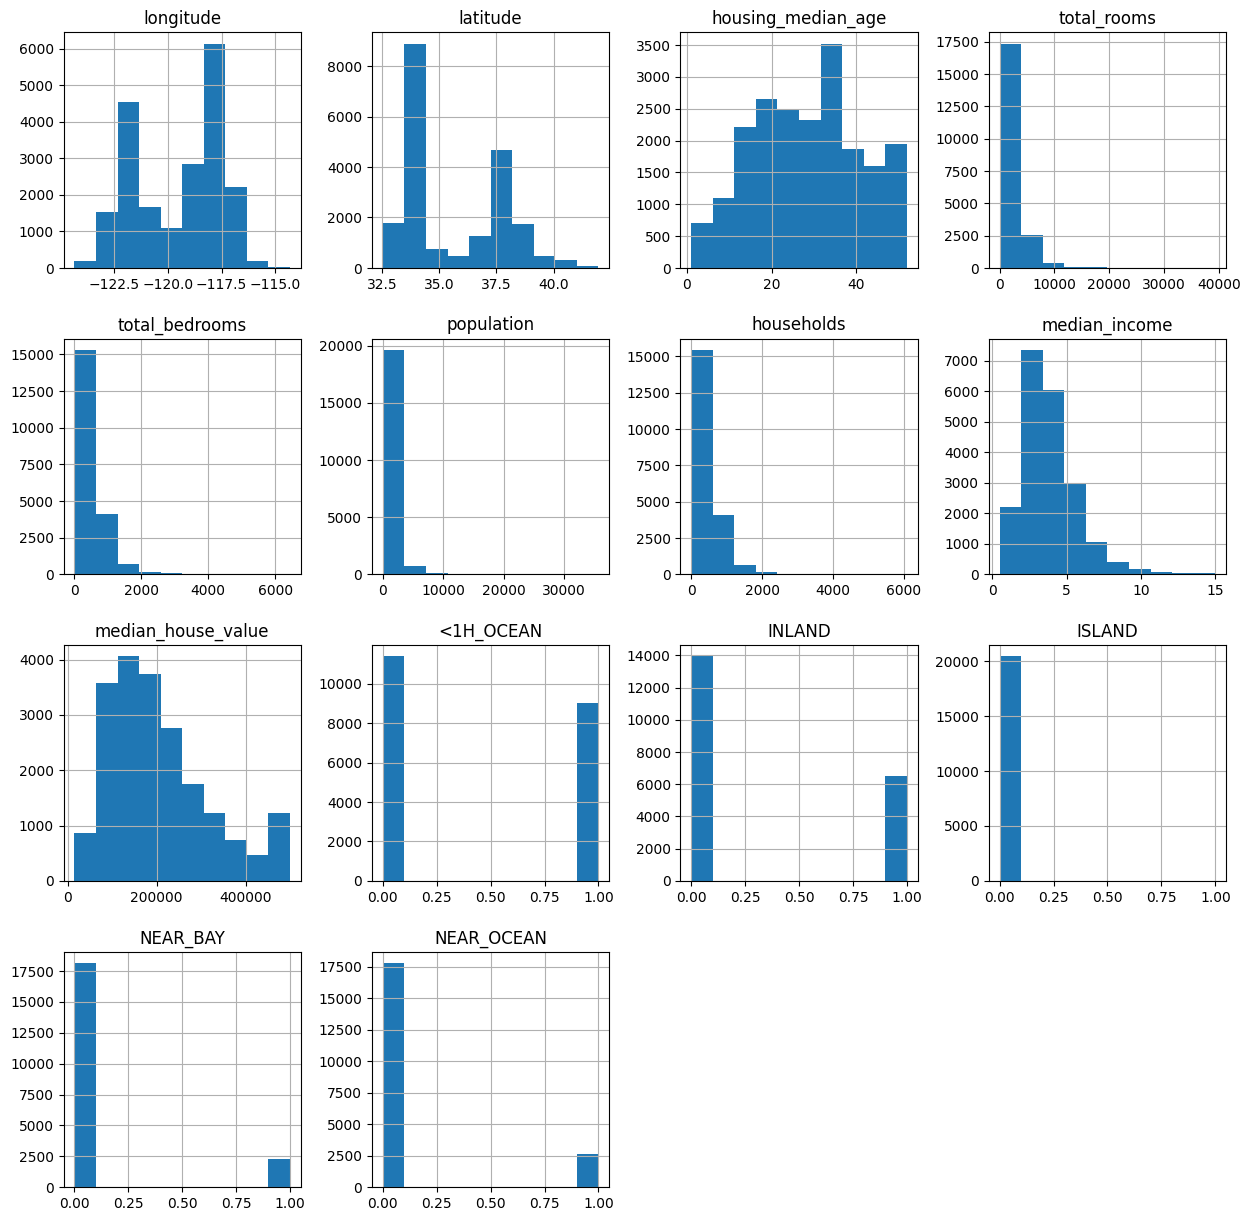

In [67]:
dataset.hist(figsize=(15,15))
plt.show()

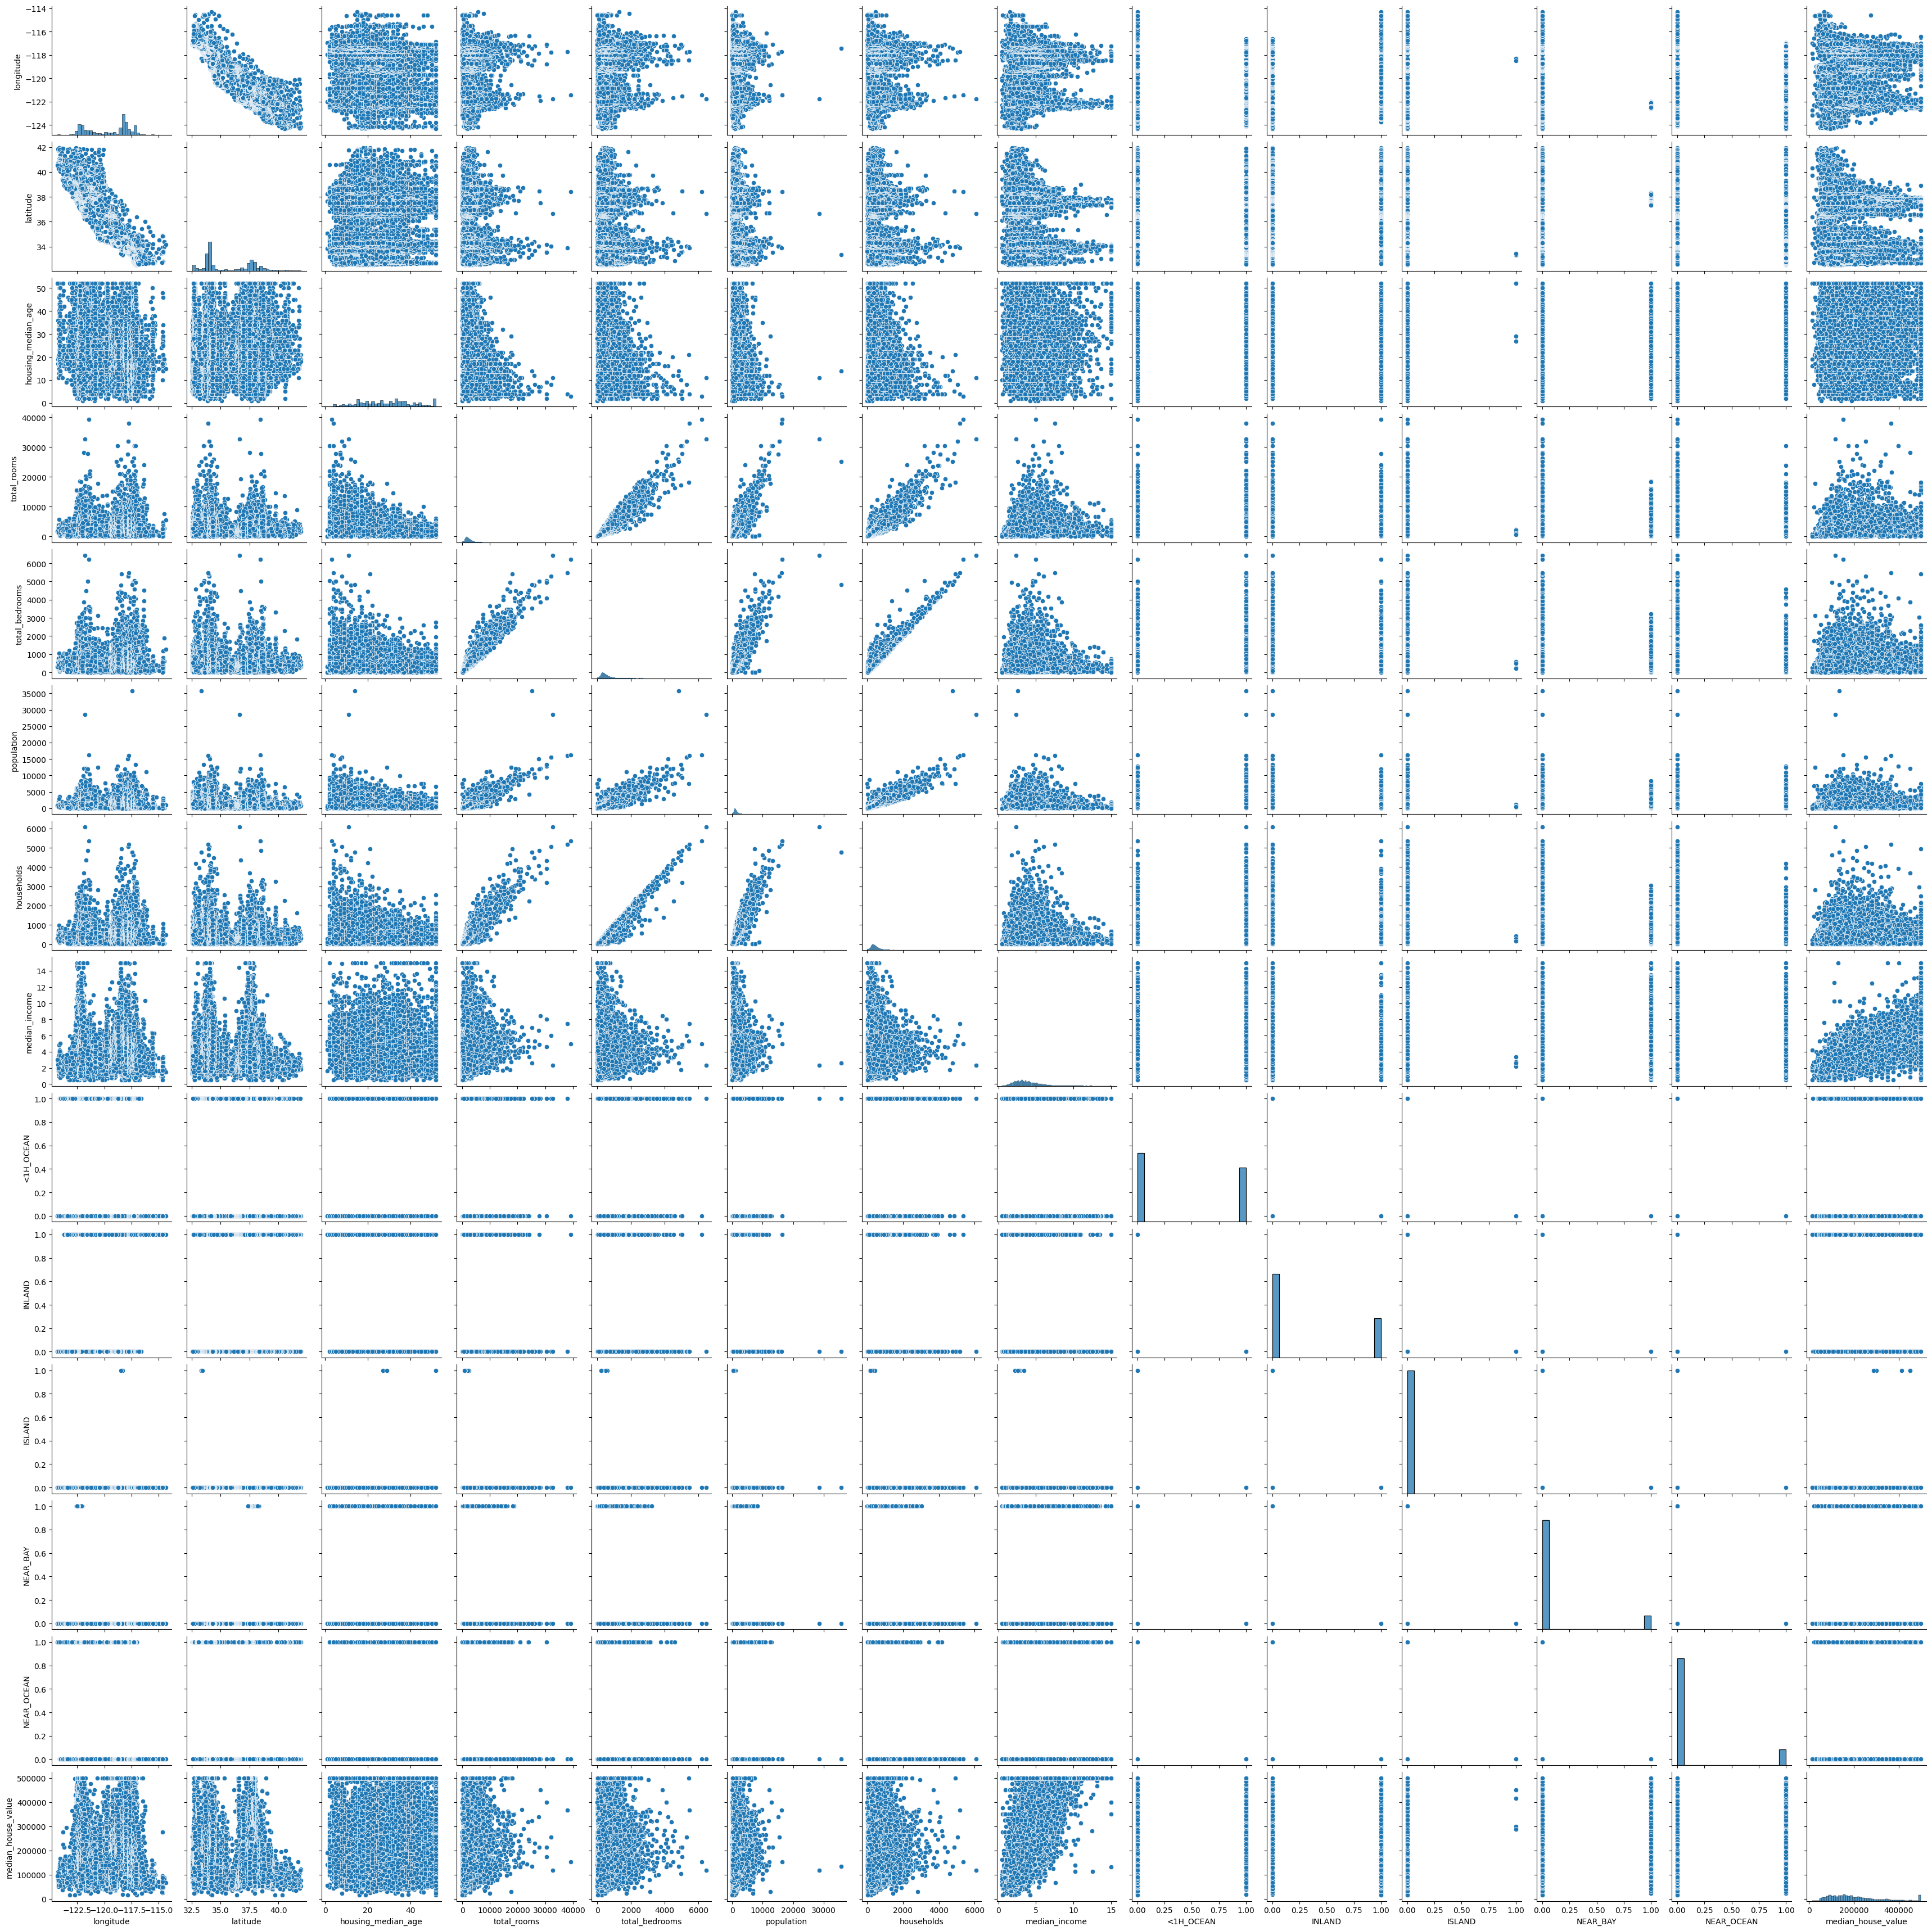

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(dataset);


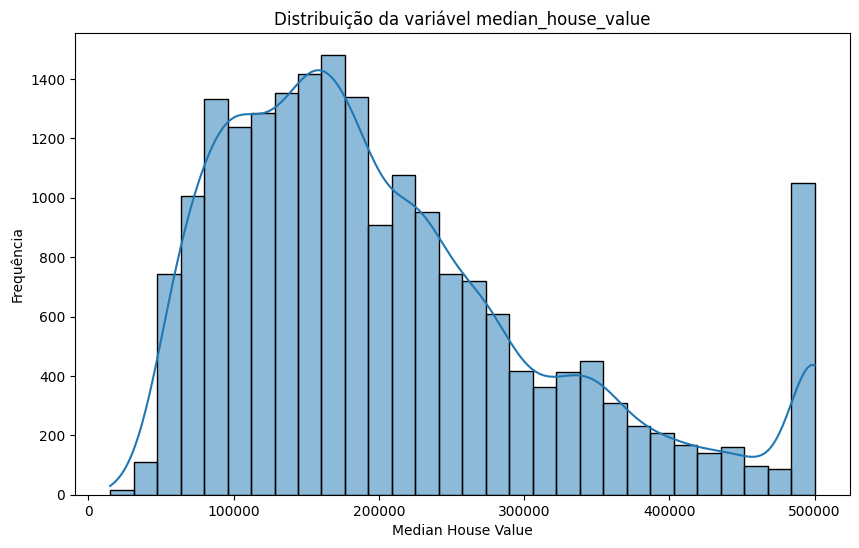

In [ ]:
#
#   Histograma da variável Median house value
#
plt.figure(figsize=(10, 6))
sns.histplot(dataset['median_house_value'], bins=30, kde=True)
plt.title('Distribuição da variável median_house_value')
plt.xlabel('Median House Value')
plt.ylabel('Frequência')
plt.show()

In [ ]:
#
#   Exibindo Sumário estatístico
#
#   Observamos que todas as variáveis quantitativas são discretas.
#
#
dataset.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value     <1H_OCEAN        INLAND        ISLAND  \
count        20640.000000  20640.000000  20640.000000  20640.000000   
mean        206855.816909      0.442636      0.317393      0.000242   
std         115395.615874      0.496710      0.465473      0.015563   
min          14999.000000      0.000000      0.000000      0.000000   
25%         119600.000000      0.000000      0.000000      0.000000   
50%         179700.000000      0.000000      0.000000      0.000000   
75%         264725.000000      1.000000      1.000000      0.000000   
max         500001.000000      1.000000      1.000000      1.000000   

           NEAR_BAY    NEAR_OCEAN  
count  20640.000000  20640.000000  
mean       0.110950      0.128779  
std        0.314077      0.334963  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [ ]:
#
#   Verificação da distribuição da variável median_income
#
dataset['median_income'].describe().round(2)

count    20640.00
mean         3.87
std          1.90
min          0.50
25%          2.56
50%          3.53
75%          4.74
max         15.00
Name: median_income, dtype: float64

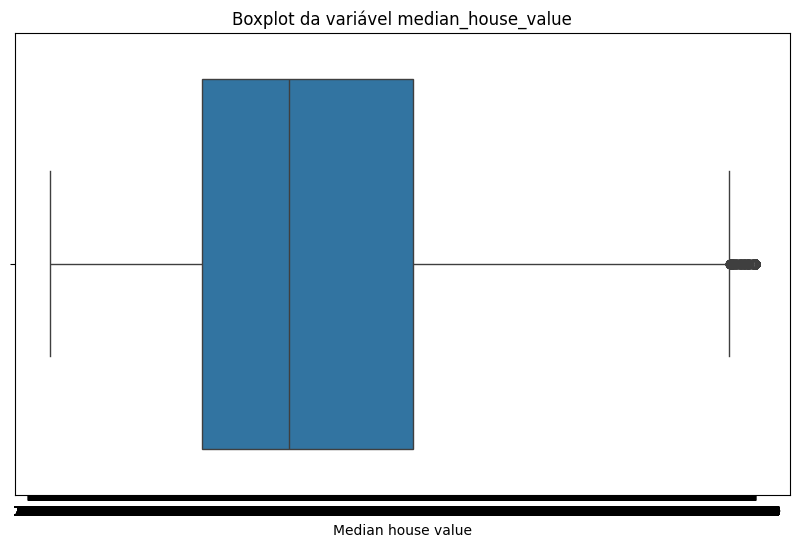

In [ ]:
#
#   Exploração da variável median_income com o gráfico boxplot
#
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['median_house_value'])
plt.title('Boxplot da variável median_house_value')
plt.xlabel('Median house value')

# Definir os ticks do eixo x de 5 em 5
plt.xticks(ticks=range(50, int(dataset['median_house_value'].max()) + 5, 5))

plt.show()

In [ ]:
# função com estatisticas sobre colunas com dados faltantes

def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if dataset[col].isna().any():
      qtd, _ = df[dataset[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [68]:
#
#   Preparação dos dados
#

# Nome da coluna a ser movida
coluna_target = 'median_house_value'

# Lista de colunas do DataFrame
colunas = list(dataset.columns)

# Remover a coluna a ser movida da lista de colunas
colunas.remove(coluna_target)

# Adicionar a coluna a ser movida ao final da lista de colunas
colunas.append(coluna_target)

# Reordenar o DataFrame com as colunas na nova ordem
dataset = dataset[colunas]

print("\nDataFrame com a coluna 'median_house_value' na última posição:")
print(dataset)



DataFrame com a coluna 'B' na última posição:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                  25         1665           374.0   
20429    -121.21     39.49                  18          697           150.0   
20430    -121.22     39.43                  17         2254           485.0   
20431    -121.32     39.43                  18         1860           409.0   
20432    -121.24     39.37                  16         2785           616.0   

    

In [70]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=7)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 7 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:13]))


Número original de atributos: 13

Número reduzido de atributos: 7

Atributos Originais: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN'],
      dtype='object')

Scores dos Atributos Originais: [1.054 1.257 1.118 1.554 1.149 1.198 1.209 6.778 2.104 3.786 0.421 1.247
 1.239]

Atributos Selecionados: ['latitude' 'total_rooms' 'median_income' '<1H_OCEAN' 'INLAND' 'NEAR_BAY'
 'NEAR_OCEAN']


In [71]:
#
#   Excluindo colunas do dataset
#
# dataset = dataset.drop(columns=['longitude','housing_median_age','total_bedrooms','population','households','ISLAND'])
#
# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:7] # atributos
y = array[:,7] # classe (target)
print(X)
print(y)

[[-122.23   37.88   41.   ...  129.    322.    126.  ]
 [-122.22   37.86   21.   ... 1106.   2401.   1138.  ]
 [-122.24   37.85   52.   ...  190.    496.    177.  ]
 ...
 [-121.22   39.43   17.   ...  485.   1007.    433.  ]
 [-121.32   39.43   18.   ...  409.    741.    349.  ]
 [-121.24   39.37   16.   ...  616.   1387.    530.  ]]
[8.325 8.301 7.257 ... 1.7   1.867 2.389]


In [72]:
dataset

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                  25         1665           374.0   
20429    -121.21     39.49                  18          697           150.0   
20430    -121.22     39.43                  17         2254           485.0   
20431    -121.32     39.43                  18         1860           409.0   
20432    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  <1H_OCEAN  INLAND  ISLAND  \
0             322         126         8.3252        0.0     0.0     0.0   
1            2401        1138         8.3014        0.0     0.0     0.0   
2             496         177         7.2574        0.0     0.0     0.0   
3             558         219         5.6431        0.0     0.0     0.0   
4             565         259         3.8462        0.0     0.0     0.0   
...           ...         ...            ...        ...     ...     ...   
20428         845         330         1.5603        0.0     1.0     0.0   
20429         356         114         2.5568        0.0     1.0     0.0   
20430        1007         433         1.7000        0.0     1.0     0.0   
20431         741         349         1.8672        0.0     1.0     0.0   
20432        1387         530         2.3886        0.0     1.0     0.0   

       NEAR_BAY  NEAR_OCEAN  median_house_value  
0           1.0         0.0              452600  
1           1.0         0.0              358500  
2           1.0         0.0              352100  
3           1.0         0.0              341300  
4           1.0         0.0              342200  
...         ...         ...                 ...  
20428       0.0         0.0               78100  
20429       0.0         0.0               77100  
20430       0.0         0.0               92300  
20431       0.0         0.0               84700  
20432       0.0         0.0               89400  

[20433 rows x 14 columns]

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
scoring = 'neg_mean_squared_error'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 2.06 (0.18) - RMSE 1.43
Ridge: MSE 2.06 (0.18) - RMSE 1.43
Lasso: MSE 2.37 (0.20) - RMSE 1.54
KNN: MSE 1.56 (0.08) - RMSE 1.25
CART: MSE 1.88 (0.14) - RMSE 1.37
SVM: MSE 1.84 (0.15) - RMSE 1.36


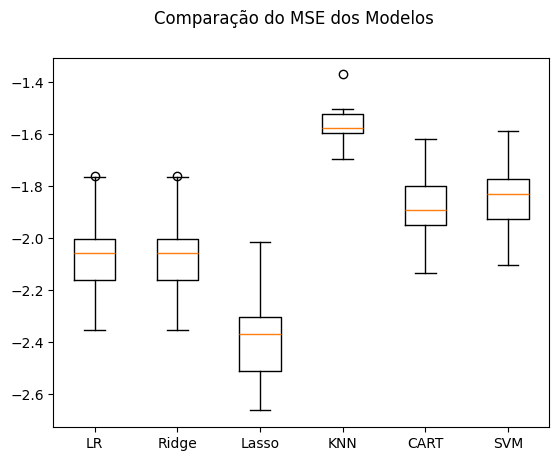

In [75]:
#
#     Criação e avaliação dos Modelos
#
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 5409279863.52
RMSE 73547.81


In [54]:
#
#   Excluindo colunas do dataset
#
# dataset = dataset.drop(columns=['longitude','housing_median_age','total_bedrooms','population','households','ISLAND'])
#
# Separação em bases de treino e teste (holdout)
# dfselect = dataset.loc[0:200]
array = dataset.values
# array = dfselect.values
X = array[:,0:7] # atributos
y = array[:,7] # classe (target)
print(X)
print(y)
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão


[[3.788e+01 8.800e+02 8.325e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.786e+01 7.099e+03 8.301e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.785e+01 1.467e+03 7.257e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [3.943e+01 2.254e+03 1.700e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [3.943e+01 1.860e+03 1.867e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [3.937e+01 2.785e+03 2.389e+00 ... 1.000e+00 0.000e+00 0.000e+00]]
[452600. 358500. 352100. ...  92300.  84700.  89400.]


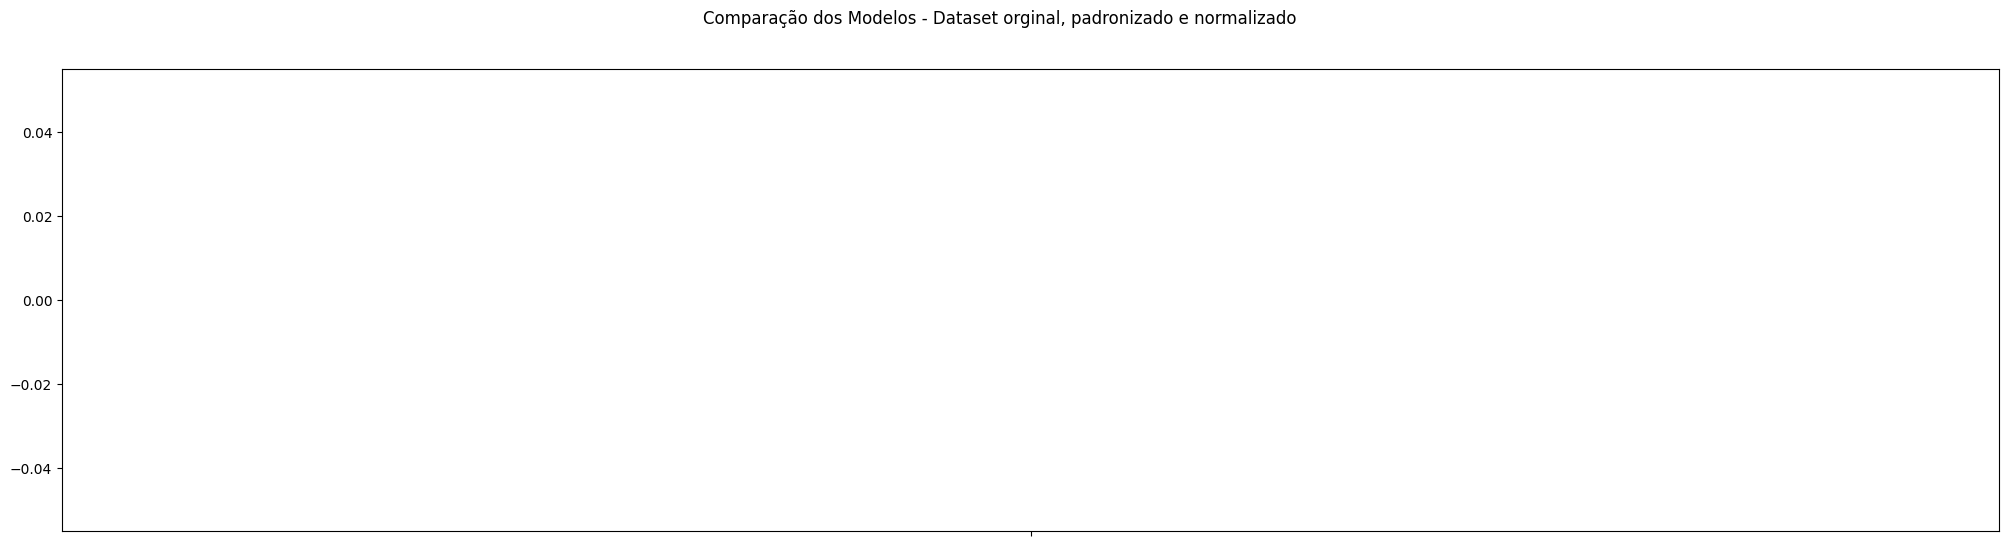

In [56]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3
scoring = 'neg_mean_squared_error'

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVR()
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVR', SVR())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))



# Executando os pipelines
for name, model in pipelines:
    print(name)
    print(model)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [57]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3
scoring = 'neg_mean_squared_error'

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVR()
bases.append(('svm', model3))

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVR())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    print(name)
    print(model)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

LR-orig
Pipeline(steps=[('LR', LogisticRegression(max_iter=200))])


KeyboardInterrupt: 